In [1]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
plv_hist = np.genfromtxt('plv_hist.csv', delimiter=",")
plv_pi = np.genfromtxt('plv_pi.csv', delimiter=",")
volc_sigl = -1*np.genfromtxt('sigl.txt', delimiter=",")
volc_source_sigl = np.genfromtxt('volc_source_850_1849.csv', delimiter=",")
pdo = np.genfromtxt('pdo_ipsl_pmip3.csv', delimiter=",")[:-12]
pdo_diff = np.genfromtxt('pdo_ipsl_pmip3_850_1849_first_diff.csv', delimiter=",")
pdo_warm = np.genfromtxt('pdo_ipsl_pmip3_850_1849_first_diff_es_warm.csv', delimiter=",")
pdo_cold = np.genfromtxt('pdo_ipsl_pmip3_850_1849_first_diff_es_cold.csv', delimiter=",")

volc_data = volc_sigl[1:998]

# in volc_source_sigl indices 0 and 999 represent 850 and 1849, 0:999 will give 0:998 
# in reality, 1 represents 851 and 998 represents 1848
volc_source_data = volc_source_sigl[1:999]

volc_data_mon = np.zeros((997*12))
volc_source_data_mon = np.zeros((997*12))

volc_data_mon[0:6] = volc_data[0]
volc_source_data_mon[0:6] = volc_source_data[0]

volc_data_mon[11958:11964] = volc_data[-1]
volc_source_data_mon[11958:11964] = volc_source_data[-1]

for yyyy in range(996):
    volc_data_mon[6+yyyy*12:18+yyyy*12] = volc_data[1+yyyy]
    volc_source_data_mon[6+yyyy*12:18+yyyy*12] = volc_source_data[1+yyyy]
print(volc_source_data[0:10])
print(volc_source_data_mon[0:120])

# Creating a 2D array plv whose first column will contain plv for PI and the second column 
# will contain the plv for historical

plv = np.zeros((plv_pi.shape[0], 2))
plv[:,0] = plv_pi[:]
plv[:,1] = plv_hist[0:11964]
pdo_plv = pdo[18:-18]
#print(plv.shape)
plv_data = pd.DataFrame(plv, columns=['plv_pi', 'plv_hist'])
xy_line = (0, 1)
thres = 0.95
volc_thres = 3.7

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
pdo_1 = pdo_plv[plv[:,1]>0.95]
pdo_2 = np.zeros((pdo_plv.shape[0]))
pdo_3 = np.zeros((pdo_plv.shape[0]))
for i in range(plv[:,1].shape[0]):
    if(plv[i,1]<0.95):
        continue
    pdo_2[i] = pdo_plv[i]
    
for i in range(plv[:,1].shape[0]):
    if(plv[i,1]>0.95):
        continue
    pdo_3[i] = pdo_plv[i]

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


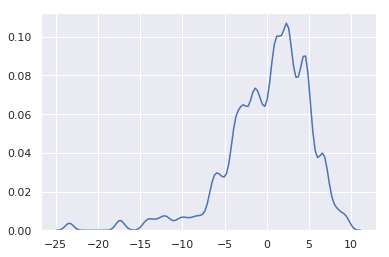

In [3]:
# Distribution of PDO values for randomly chosen time points corresponding to:
# a) all those cases where there is statistically significant PLV values (green shading in Fig 1)
import random
import warnings
N=100000
dummy_hist_scatter = np.zeros((N))
niter = 0
while niter < N:
    rand_year = random.sample(range(1, 2411), 1)
    dummy_hist_scatter[niter] = pdo_1[rand_year]
    niter = niter + 1
sns.kdeplot(dummy_hist_scatter[:])

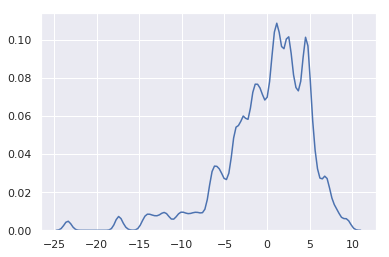

In [4]:
# b) all those cases as in (a) above but also which have a volcanic event in the preceding 10 years
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
pdo_hist_monte_carlo = np.zeros((Nsample))
pdo_hist_monte_carlo = pdo_2
niter = 0
dummy_hist_scatter = np.zeros((N,120))
while niter < N:
    rand_year = random.sample(range(10, 11830), 1)
    #print(rand_year[0])
    dummy = pdo_hist_monte_carlo[rand_year[0]:rand_year[0]+120]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]:rand_year[0]+120]) < 0.1:
        continue
    dummy_hist_scatter[niter,:] = dummy_1
    niter = niter + 1
    #print(niter)
dist_1 = dummy_hist_scatter.flatten()
pdo_dist = dist_1[dist_1 != 0.]

sns.kdeplot(pdo_dist)

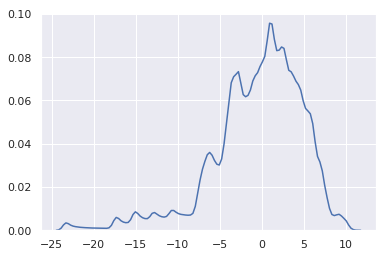

In [5]:
# c) all those cases which correspond to 10 years after any strong volcanic event (irrespective of phase locking)
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
pdo_hist_monte_carlo = np.zeros((Nsample))
pdo_hist_monte_carlo = pdo_plv
niter = 0
dummy_hist_scatter = np.zeros((N,120))
while niter < N:
    rand_year = random.sample(range(10, 11830), 1)
    #print(rand_year[0])
    dummy = pdo_hist_monte_carlo[rand_year[0]:rand_year[0]+120]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]:rand_year[0]+120]) < 0.1:
        continue
    dummy_hist_scatter[niter,:] = dummy_1
    niter = niter + 1
    #print(niter)
dist_1 = dummy_hist_scatter.flatten()
pdo_dist = dist_1[dist_1 != 0.]

sns.kdeplot(pdo_dist)

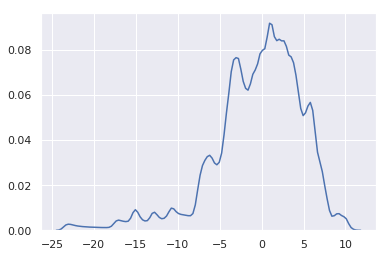

In [10]:
# d) all those cases which correspond to non-significant PLV values after a strong volcanic event
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
pdo_hist_monte_carlo = np.zeros((Nsample))
pdo_hist_monte_carlo = pdo_3
niter = 0
dummy_hist_scatter = np.zeros((N,120))
while niter < N:
    rand_year = random.sample(range(10, 11830), 1)
    #print(rand_year[0])
    dummy = pdo_hist_monte_carlo[rand_year[0]:rand_year[0]+120]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]:rand_year[0]+120]) < 0.1:
        continue
    dummy_hist_scatter[niter,:] = dummy_1
    niter = niter + 1
    #print(niter)
dist_1 = dummy_hist_scatter.flatten()
pdo_dist = dist_1[dist_1 != 0.]

sns.kdeplot(pdo_dist)